# 3. CNN 이용하여 MINST 분류하기(Functional API)
- 참고 사이트 : Functional API
> https://keras.io/guides/functional_api/ <br>
> https://wikidocs.net/38861

## Import modules

In [1]:
import tensorflow as tf

## 데이터 불러오기

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train.shape, y_test.shape

((60000,), (10000,))

## 네트워크 구조 정의

#### ㅇ CNN 입력 구조 : 4차원 : Batch * Height * Weidth * Channel

In [5]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28 ,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28 ,1)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
# Sequential 모델하기
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', 
#                  activation='relu',
#                  input_shape=(28,28,1)))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# model.add(Conv2D(64,(2,2), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(10, activation='softmax'))

# Functional API 모델링하기
inputs = Input(shape=(28, 28, 1))
conv1 = Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu')(inputs)
pool1 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv1)
conv2 = Conv2D(filters=64, kernel_size=(2, 2), padding='same', activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
drop2 = Dropout(0.2)(pool2)
flat3 = Flatten()(drop2)
dense4 = Dense(units=128, activation='relu')(flat3)
drop4 = Dropout(0.3)(dense4)
outputs = Dense(10, activation='softmax')(drop4)
model = Model(inputs=inputs, outputs=outputs)

## Keras 모델 Compile

In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [9]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [10]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0     

## 학습 수행

In [11]:
EPOCHS = 5
BATCH_SIZE = 1024

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [13]:
es = EarlyStopping(monitor='val_loss', patience=4, mode='min', verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [14]:
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[es, mc], validation_data=(x_test, y_test))

Epoch 1/5
59/59 [==============================] - 35s 34ms/step - loss: 1.2121 - accuracy: 0.6406 - val_loss: 0.1685 - val_accuracy: 0.9497

Epoch 00001: val_accuracy improved from -inf to 0.94970, saving model to best_model.h5
Epoch 2/5
59/59 [==============================] - 1s 24ms/step - loss: 0.1956 - accuracy: 0.9407 - val_loss: 0.0874 - val_accuracy: 0.9732

Epoch 00002: val_accuracy improved from 0.94970 to 0.97320, saving model to best_model.h5
Epoch 3/5
59/59 [==============================] - 1s 24ms/step - loss: 0.1143 - accuracy: 0.9649 - val_loss: 0.0596 - val_accuracy: 0.9811

Epoch 00003: val_accuracy improved from 0.97320 to 0.98110, saving model to best_model.h5
Epoch 4/5
59/59 [==============================] - 1s 23ms/step - loss: 0.0887 - accuracy: 0.9734 - val_loss: 0.0466 - val_accuracy: 0.9847

Epoch 00004: val_accuracy improved from 0.98110 to 0.98470, saving model to best_model.h5
Epoch 5/5
59/59 [==============================] - 1s 23ms/step - loss: 0.0698

## 학습 결과 테스트

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0391 - accuracy: 0.9869


[0.03908585011959076, 0.9868999719619751]

## 성능 그래프

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
x_range = range(1,len(history.history['accuracy'])+1)

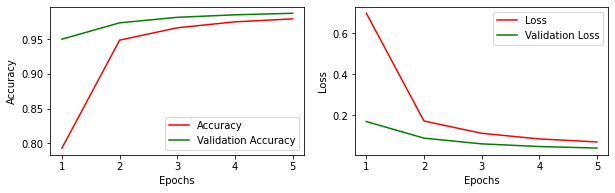

In [18]:
plt.figure(figsize=(10,6))
plt.subplot(221)
plt.plot(x_range, history.history['accuracy'], color='red', label='Accuracy')
plt.plot(x_range, history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(222)
plt.plot(x_range, history.history['loss'], color='red', label='Loss')
plt.plot(x_range, history.history['val_loss'], color='green', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 실전 테스트

In [19]:
x_test[0].shape

(28, 28, 1)

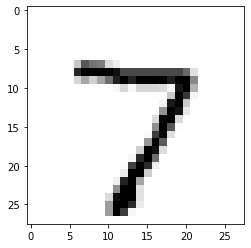

The Answer is  7


In [20]:
import numpy as np

n = 0
plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', np.argmax(model.predict(x_test[n].reshape(1,28,28,1))))

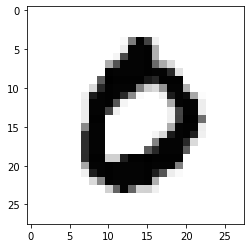

The Answer is  0


In [21]:
n = 3
plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', np.argmax(model.predict(x_test[n].reshape(1,28,28,1))))